# Classificação com dados desbalanceados

## Carregamento da base de dados

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')

In [3]:
dataset.shape

(2000, 5)

In [4]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

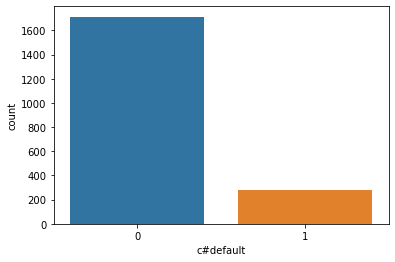

In [6]:
import seaborn as sns
sns.countplot(x=dataset['c#default']);

In [7]:
X = dataset.iloc[:, 1:4].values

In [8]:
X.shape

(1997, 3)

In [9]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [10]:
y = dataset.iloc[:, 4].values

In [11]:
y.shape

(1997,)

In [12]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Base de treinamento e teste

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [15]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [16]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [17]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [18]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [19]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [20]:
1371 / len(y_treinamento), 226 / len(y_treinamento)

(0.8584846587351284, 0.14151534126487164)

In [21]:
np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [22]:
343 / len(y_teste), 57 / len(y_teste)

(0.8575, 0.1425)

## Classificação com Naïve Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [25]:
previsoes = modelo.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
y_teste

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
accuracy_score(y_teste, previsoes)

0.9225

In [29]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[335,   8],
       [ 23,  34]], dtype=int64)

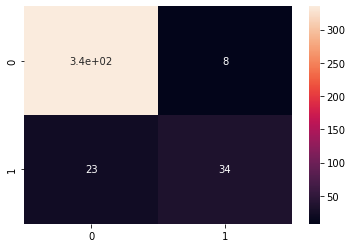

In [30]:
sns.heatmap(cm, annot=True);

In [31]:
(338 + 40) / (338 + 5 + 17 + 40)

0.945

In [32]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 5)

0.9853372434017595

In [33]:
# Percentual de acerto para pessoas que não pagam o empréstimo
40 / (40 + 17)

0.7017543859649122

In [34]:
# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 30 / 100

300.0

In [35]:
300 * 5000

1500000

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [36]:
from imblearn.under_sampling import TomekLinks

In [46]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [47]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [48]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [49]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [50]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)
X_treinamento_u.shape, y_treinamento_u.shape

((1517, 3), (1517,))

In [52]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(y_teste_u, previsoes_u)

0.9210526315789473

In [53]:
cm_u = confusion_matrix(y_teste_u, previsoes_u)
cm

array([[335,   8],
       [ 23,  34]], dtype=int64)

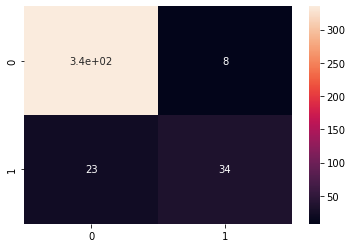

In [55]:
sns.heatmap(cm, annot=True);

In [59]:
335 / (335 + 8)

0.9766763848396501

In [58]:
34 / (34 + 23)

0.5964912280701754

## Sobreamostragem (oversampling) - SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [62]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [63]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [64]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [66]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [77]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo.predict(X_teste_o)
accuracy_score(y_teste_o, previsoes_o)

0.9139941690962099

In [78]:
cm_o = confusion_matrix(y_teste_o, previsoes_o)
cm_o

array([[299,  44],
       [ 15, 328]], dtype=int64)

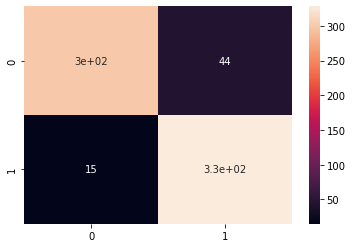

In [79]:
sns.heatmap(cm_o, annot=True);

In [80]:
299 / (299 + 44)

0.8717201166180758

In [81]:
328 / (328 + 15)

0.956268221574344

In [82]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 5 / 100

50.0

In [83]:
50 * 5000

250000

In [84]:
1500000 - 250000

1250000

# Exercício

Olá,

O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados

Carregue a base de dados csv_result-ebay_confianca_completo.csv, que é uma base de dados que utilizei no meu pós-doutorado para prever confiança de usuários baseado em traços de personalidade extraídos de textos

A classe é o atributo reputation, que pode ser reputação boa ou reputação ruim

Utilize o algoritmo Random Forest e faça os três testes conforme o exemplo anterior. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão. A ideia de utilização é a mesma, e no link a seguir você pode verificar a documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [98]:
dados = pd.read_csv('Bases de dados/csv_result-ebay_confianca_completo.csv')
dados.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [96]:
dados.shape

(5806, 75)

In [99]:
dados['blacklist'] = dados['blacklist'] == 'S'

In [100]:
dados

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,49,0,False,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,False,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,False,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,False,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim


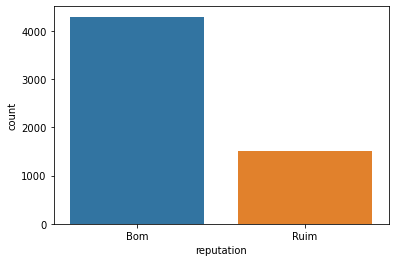

In [103]:
import seaborn as sns
sns.countplot(x=dados['reputation']);

In [110]:
X_ex = dados.iloc[:, 0:74].values
y_ex = dados.iloc[:, 74].values

In [111]:
X_ex, y_ex

(array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
         0.828716381071851],
        [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
         0.8093789692710098],
        [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
         0.82603890125472],
        ...,
        [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
         0.8320726536961992],
        [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
         0.8199238314070743],
        [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
         0.7920921058167003]], dtype=object),
 array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object))

In [112]:
X_ex.shape, y_ex.shape

((5806, 74), (5806,))

In [113]:
np.unique(y_ex, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [109]:
from sklearn.model_selection import train_test_split

In [114]:
X_treinamento_ex, X_teste_ex, y_treinamento_ex, y_teste_ex = train_test_split(X_ex, y_ex, test_size=0.2, stratify=y_ex)

In [117]:
X_treinamento_ex.shape, X_teste_ex.shape

((4644, 74), (1162, 74))

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
modelo_ex = RandomForestClassifier()
modelo_ex.fit(X_treinamento_ex, y_treinamento_ex)

RandomForestClassifier()

In [126]:
previsoes_ex = modelo_ex.predict(X_teste_ex)
previsoes_ex

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object)

In [127]:
y_teste_ex

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object)

In [128]:
accuracy_score(y_teste_ex, previsoes_ex)

0.7504302925989673

In [129]:
cm_ex = confusion_matrix(y_teste_ex, previsoes_ex)
cm

array([[335,   8],
       [ 23,  34]], dtype=int64)

<AxesSubplot:>

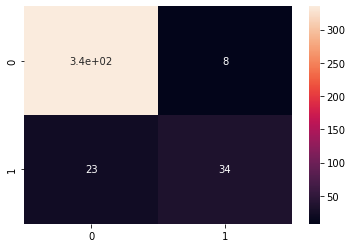

In [130]:
sns.heatmap(cm, annot=True)

In [131]:
from imblearn.under_sampling import TomekLinks

In [140]:
tl_ex = TomekLinks(sampling_strategy='majority')
X_under_ex, y_under_ex = tl_ex.fit_resample(X_ex, y_ex)
X_under_ex_treinamento, X_under_ex_teste, y_under_ex_treinamento, y_under_ex_teste = train_test_split(X_under_ex, y_under_ex, test_size=0.2, stratify=y_under_ex)
modelo_under_ex = RandomForestClassifier()
modelo_under_ex.fit(X_under_ex_treinamento, y_under_ex_treinamento)
previsoes_under_ex = modelo_under_ex.predict(X_under_ex_teste)
accuracy_score(y_under_ex_teste, previsoes_under_ex)

0.738929889298893

In [141]:
cm_under_ex = confusion_matrix(y_under_ex_teste, previsoes_under_ex)
cm_under_ex

array([[777,   5],
       [278,  24]], dtype=int64)

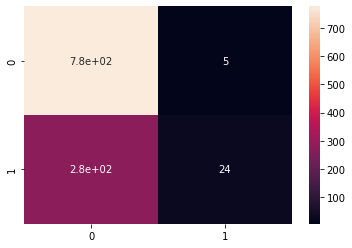

In [142]:
sns.heatmap(cm_under_ex, annot=True);

In [139]:
from imblearn.over_sampling import SMOTE

In [147]:
smote_ex = SMOTE(sampling_strategy='minority')
X_over_ex, y_over_ex = smote_ex.fit_resample(X_ex, y_ex)
X_over_ex_treinamento, X_over_ex_teste, y_over_ex_treinamento, y_over_ex_teste = train_test_split(X_over_ex, y_over_ex, test_size=0.2, stratify=y_over_ex)
modelo_over_ex = RandomForestClassifier()
modelo_over_ex.fit(X_over_ex_treinamento, y_over_ex_treinamento)
previsoes_over_ex = modelo_over_ex.predict(X_over_ex_teste)
accuracy_score(y_over_ex_teste, previsoes_over_ex)

0.8174418604651162

In [145]:
cm_over_ex = confusion_matrix(y_over_ex_teste, previsoes_over_ex)
cm_over_ex

array([[684, 176],
       [158, 702]], dtype=int64)

<AxesSubplot:>

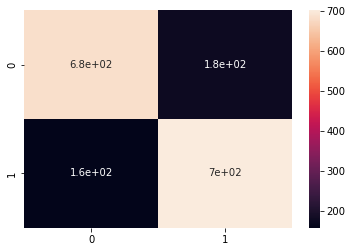

In [146]:
sns.heatmap(cm_over_ex, annot=True)